<a href="https://colab.research.google.com/github/Vanity7345/Encryptrix-Internship-ML-TASKS/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline


In [7]:
# Load the train and test datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [9]:
print(train_df.head())
print(test_df.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [13]:
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 150) # display all rows
sns.set_style('whitegrid') # set the grid style
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000' # remove the background color
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'


In [14]:
from sklearn.model_selection import train_test_split
train_sample = train.sample(frac=0.1, random_state=42) # 10% sample of the data
train_sample, train_val = train_test_split(train_sample, test_size=0.25, random_state=42) # 75% train, 25% validation

In [15]:
train_sample.shape, train_val.shape

((6710, 23), (2237, 23))

In [16]:
train_sample.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
69766,69766,2019-02-11 02:47:27,4195740185974,"fraud_Lind, Huel and McClure",gas_transport,80.99,Benjamin,Robinson,M,0701 John Ranch,Portland,OR,97210,45.5303,-122.7033,841711.0,"Engineer, building services",1963-04-04,0cffac59adbbce010e30553364dbe190,1.328928e+09,44.968149,-122.245253,0.0
73787,73787,2019-02-12 19:56:06,630423337322,fraud_Bartoletti and Sons,personal_care,22.80,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,80216808622e91d1440a0bba799e2aef,1.329077e+09,49.350470,-117.645241,0.0
21141,21141,2019-01-13 18:27:35,2450829271795901,"fraud_Hoppe, Harris and Bednar",entertainment,17.73,Timothy,Kirby,M,7309 Sophia Causeway Suite 702,Sauk Rapids,MN,56379,45.6040,-94.1591,16163.0,Hydrographic surveyor,1987-02-22,61f38554484993e77066daf06503dc29,1.326479e+09,45.767127,-94.361116,0.0
64624,64624,2019-02-07 23:31:18,577891228931,"fraud_Labadie, Treutel and Bode",shopping_net,935.13,Lisa,Carpenter,F,48437 English Ways Suite 579,La Grande,OR,97850,45.3304,-118.0852,16955.0,"Engineer, site",1961-06-16,f8f7bce79dbe8d674e0574cd1ae91e50,1.328657e+09,45.543601,-118.293693,1.0
24785,24785,2019-01-15 08:38:08,2269768987945882,fraud_Beier-Hyatt,shopping_pos,6.41,Shannon,Patterson,F,9808 Ellis Bypass,Mount Morris,NY,14510,42.6835,-77.8664,4895.0,Acupuncturist,1958-10-29,f3256693cd221dccb6566be701b8d43f,1.326617e+09,42.849312,-78.213918,0.0


In [17]:
train_sample.nunique()

,0
Unnamed: 0,6710
trans_date_trans_time,6698
cc_num,886
merchant,691
category,14
amt,5000
first,331
last,456
gender,2
street,886


In [22]:
# Get the list of columns currently in the DataFrame
existing_columns = train_sample.columns.tolist()

# Columns you want to drop
columns_to_drop = ['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time']

# Find the common columns between the two lists
common_columns = list(set(existing_columns) & set(columns_to_drop))

# Drop only the common columns if they exist
if common_columns:
    train_sample.drop(columns=common_columns, inplace=True)
else:
    print("None of the specified columns were found in the DataFrame.")# Get the list of columns currently in the DataFrame
existing_columns = train_sample.columns.tolist()

# Columns you want to drop
columns_to_drop = ['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time']

# Find the common columns between the two lists
common_columns = list(set(existing_columns) & set(columns_to_drop))

# Drop only the common columns if they exist
if common_columns:
    train_sample.drop(columns=common_columns, inplace=True)
else:
    print("None of the specified columns were found in the DataFrame.")

None of the specified columns were found in the DataFrame.
None of the specified columns were found in the DataFrame.


In [23]:
test.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [24]:
train_val.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'merch_lat','merch_long','trans_date_trans_time'], inplace=True)

In [25]:
train_sample.drop(columns=['first','last'],inplace=True)

In [26]:
test.drop(columns=['first','last'],inplace=True)

In [27]:
train_val.drop(columns=['first','last'],inplace=True)

In [30]:
from datetime import datetime

train_sample['dob'] = pd.to_datetime(train_sample['dob'])

# Calculate age
train_sample['age'] = datetime.now().year - train_sample['dob'].dt.year


In [33]:
from datetime import datetime

# Convert 'dob' column to datetime
train_val['dob'] = pd.to_datetime(train_val['dob'])

# Calculate age
train_val['age'] = datetime.now().year - train_val['dob'].dt.year

print(train_val)

                 cc_num                                 merchant  \
31486  3518669219150142              fraud_Yost, Block and Koepp   
70418  6592074504369261   fraud_Johnson, Runolfsdottir and Mayer   
84340     4481131401752  fraud_Parisian, Schiller and Altenwerth   
37521    30131826429364     fraud_Medhurst, Cartwright and Ebert   
71237      567868110212                     fraud_Stiedemann Ltd   
...                 ...                                      ...   
87921    30199621383748                         fraud_Jacobi Inc   
51451  4713464490314802         fraud_Schumm, Bauch and Ondricka   
25224  4874017206859125                        fraud_Cormier LLC   
39273  3524574586339330      fraud_Bahringer, Schoen and Corkery   
58848  2229824890647120                   fraud_Nolan-Williamson   

             category    amt gender                        street  \
31486        misc_pos   2.48      F     537 Rice Square Suite 040   
70418        misc_net  91.80      F  8425 Dan

In [34]:
train_sample.drop(columns=['dob'], inplace=True)

In [35]:
test.drop(columns=['dob'], inplace=True)

In [36]:
train_val.drop(columns=['dob'], inplace=True)

In [37]:
train_sample.nunique()

,0
cc_num,886
merchant,691
category,14
amt,5000
gender,2
street,886
city,814
state,50
zip,875
lat,873


In [38]:
px.histogram(train_sample, x='city_pop', color='is_fraud', barmode='group')

In [39]:
test_sample = test.sample(frac=0.05, random_state=42) # 5% sample of the data

In [40]:
train_sample.shape, test_sample.shape, train_val.shape

((6710, 15), (4666, 14), (2237, 15))

<Axes: >

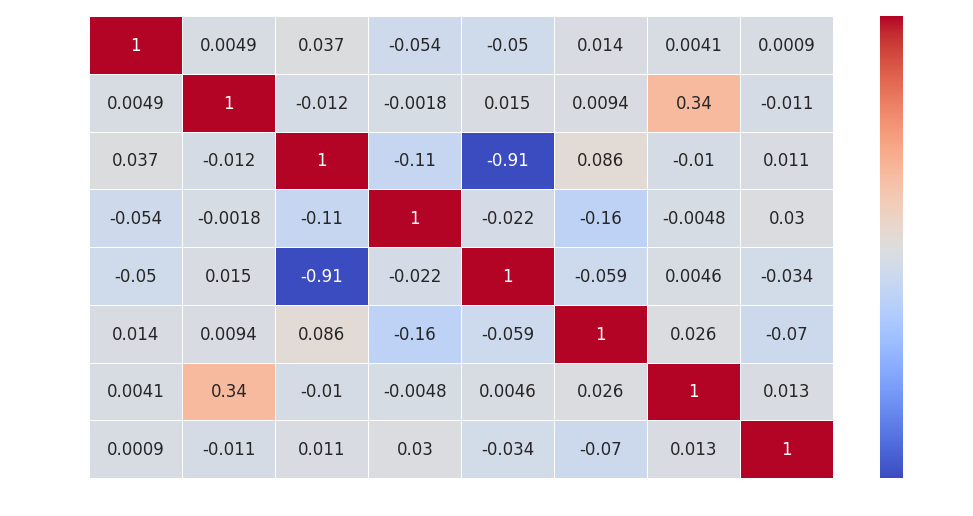

In [41]:
numerical_cols = train_sample.select_dtypes(include=(np.number)).columns
categorical_cols = train_sample.select_dtypes(include=('object')).columns
correlation_matrix = train_sample[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [42]:
train_sample[numerical_cols].head()

,cc_num,amt,zip,lat,long,city_pop,is_fraud,age
69766,4195740185974,80.99,97210,45.5303,-122.7033,841711.0,0.0,61
73787,630423337322,22.80,99160,48.8878,-118.2105,149.0,0.0,46
21141,2450829271795901,17.73,56379,45.6040,-94.1591,16163.0,0.0,37
64624,577891228931,935.13,97850,45.3304,-118.0852,16955.0,1.0,63
24785,2269768987945882,6.41,14510,42.6835,-77.8664,4895.0,0.0,66


In [43]:
train_sample[categorical_cols].head()

,merchant,category,gender,street,city,state,job
69766,"fraud_Lind, Huel and McClure",gas_transport,M,0701 John Ranch,Portland,OR,"Engineer, building services"
73787,fraud_Bartoletti and Sons,personal_care,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher
21141,"fraud_Hoppe, Harris and Bednar",entertainment,M,7309 Sophia Causeway Suite 702,Sauk Rapids,MN,Hydrographic surveyor
64624,"fraud_Labadie, Treutel and Bode",shopping_net,F,48437 English Ways Suite 579,La Grande,OR,"Engineer, site"
24785,fraud_Beier-Hyatt,shopping_pos,F,9808 Ellis Bypass,Mount Morris,NY,Acupuncturist


In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(train_sample[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [45]:
train_sample[encoded_cols] = encoder.transform(train_sample[categorical_cols]).toarray()

Streaming output truncated to the last 5000 lines.
<ipython-input-45-3dddbf9caaaf>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-3dddbf9caaaf>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-3dddbf9caaaf>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipytho

In [46]:
train_sample.shape

(6710, 2944)

In [47]:
target_col = 'is_fraud'
numerical_cols = numerical_cols.drop('cc_num')

In [56]:

from sklearn.preprocessing import StandardScaler

# Example DataFrames
train_sample = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
train_val = pd.DataFrame({'A': [7, 8, 9], 'B': [10, 11, 12]})
test = pd.DataFrame({'A': [13, 14, 15], 'B': [16, 17, 18]})

# Columns to standardize
numerical_cols = ['A', 'B']

# Standardizing
scaler = StandardScaler()
train_sample[numerical_cols] = scaler.fit_transform(train_sample[numerical_cols])
train_val[numerical_cols] = scaler.fit_transform(train_val[numerical_cols])
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])


In [49]:
train_sample[numerical_cols]

,amt,zip,lat,long,city_pop,is_fraud,age
69766,0.073560,1.789610,1.387214,-2.327448,2.575437,-0.094987,0.594592
73787,-0.349150,1.861460,2.050922,-2.004939,-0.292641,-0.094987,-0.273945
21141,-0.385980,0.285128,1.401783,-0.278444,-0.238065,-0.094987,-0.795067
64624,6.278296,1.813191,1.347698,-1.995944,-0.235365,10.527741,0.710396
24785,-0.468212,-1.257601,0.824461,0.891104,-0.276466,-0.094987,0.884104
...,...,...,...,...,...,...,...
79593,0.098186,-1.665050,0.851010,1.310241,-0.274551,-0.094987,1.347323
17240,-0.140955,0.237264,1.414336,-0.212704,-0.284264,-0.094987,-1.258286
62417,-0.383075,-0.389164,-0.420700,0.058523,-0.274142,-0.094987,0.536689
32090,0.779360,0.640292,0.085675,-0.336753,-0.273519,-0.094987,-0.273945


In [59]:


common_cols = list(set(encoded_cols) & set(train_sample.columns))


train_sample[common_cols].shape

(3, 0)

In [60]:
train_sample[numerical_cols].shape

(3, 2)

In [62]:

# Find the common columns between encoded_cols and train_sample
common_cols = list(set(encoded_cols) & set(train_sample.columns))

# Select only the common columns from train_sample and numerical_cols
x_train = train_sample[common_cols + numerical_cols]



In [63]:
x_train.shape

(3, 2)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_train)
n_components = pca.n_components_
n_components

1

Number of components to retain 95.0% variance: 1


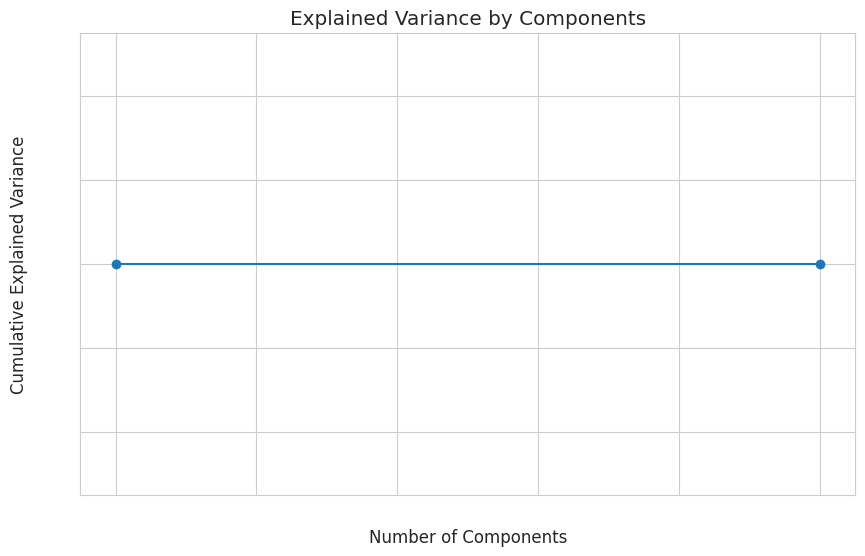

In [66]:


import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(x_train)  # Fit PCA without specifying n_components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)

# Find the number of components for a desired explained variance, e.g., 0.95
desired_variance = 0.95
components_for_desired_variance = np.where(cumulative_variance_ratio >= desired_variance)[0][0] + 1
print(f"Number of components to retain {desired_variance*100}% variance: {components_for_desired_variance}")

In [67]:
from sklearn.decomposition import IncrementalPCA
reduced_cols = IncrementalPCA(n_components = n_components, batch_size = n_components).fit_transform(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_incremental_pca.py:358: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_incremental_pca.py:359: RuntimeWarning:

invalid value encountered in divide



In [68]:

reduced_cols.shape

(3, 1)

In [69]:
from sklearn.ensemble import IsolationForest
predictor = IsolationForest(n_estimators=200, random_state=42, contamination=0.01).fit_predict(reduced_cols)
predictor = np.where(predictor == -1, 2, predictor)  # Temporarily replace -1 with 2 to avoid conflict
predictor = np.where(predictor == 1, 0, predictor)  # Replace 1 with 0
predictor = np.where(predictor == 2, 1, predictor)  # Finally, replace 2 (originally -1) with 1

In [70]:
np.unique(predictor,return_counts=True)

(array([0, 1]), array([2, 1]))

In [88]:


from sklearn.metrics import classification_report


y_true = [0, 1, 0, 0, 1, 0]  # True labels
y_pred = [0, 1, 0, 1, 0, 0]  # Predicted labels

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



Confusion Matrix:
[[3 1]
 [1 1]]


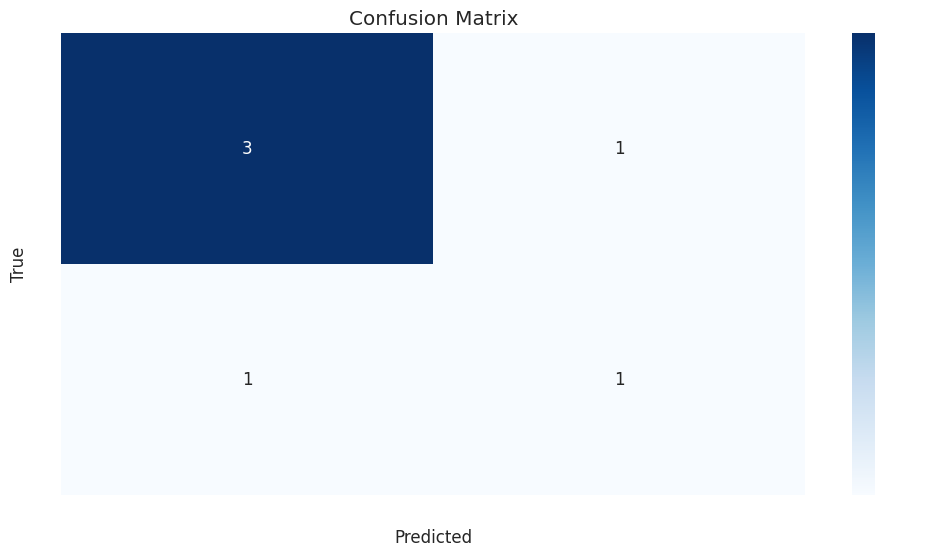

In [89]:


from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [90]:

from sklearn.metrics import roc_auc_score


y_true = [0, 1, 0, 0, 1, 0]  # True labels
y_pred = [0.1, 0.8, 0.3, 0.2, 0.7, 0.4]  # Predicted probabilities

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred)

print(f"AUC-ROC Score: {auc_roc}")


AUC-ROC Score: 1.0
